## Assignment 9 - Choose your own adventure

For this assignment, you will wrangle your own data to show some meaningful visualizations of a feature that will be of interest to your particular topic of analysis. From the list of available choices below, **you will choose TWO visualizations to create from your own corpus data, one from the "A" group and one from the "B" group.** Note that some visualizations in the B group may be combined in a single plot (e.g., stacked bar plot), or may require multiple plots or "side by side" plots. 

Every project group is analyzing at least one of: *harmony, melody, and/or rhythm*, so it should not be hard to find something from the lists below to suit your needs. (However, if you would like to propose an alternative, you must approve it with me first.)

Note: some of you have a between-groups design and others of you are still looking at 'groups' but in this case the groups have a linear relationship (e.g., epochs over time). In that case, be sure to make any plots or visualizations with the groups appropriately ordered.


## A group: basic distributions and categorizations



* Distribution of melodic intervals between/across groups (may be directed or undirected as relevant, usually best to collapse to simple from compound)


* Comparison of melodic interval ranges in semitones including means and standard deviations (e.g., boxplots or whisker plots) between/across groups


* Comparison of the distribution of harmonic intervals between/across groups


* Comparison/categorization of consonant to dissonant harmonic intervals between/across groups


* Distribution of rhythmic values (durations), or inter-onset intervals (if you don't have durations) between/across groups


* Distribution of beats or beat onsets (or onsets relative to measure in music21) between/across groups


* Distribution of harmonies used (with vocabulary reduced as appropriate for your dataset) between/across groups






## B group pairwise comparisons, sequential relations, or more complex grouping
bigrams = antecedent to consequent pairs using a sliding window (like humdrum "context") <br/>
If you have groups or are making comparisons over time or epochs, most of these could be performed similarly.

* Comparison of interval bigrams 


* Comparison of contour bigrams


* Comparison of harmonic bigrams


* Comparison of IOI or duration bigrams (either differences or absolutes?)


* Comparison of consonant or dissonant intervals on strong versus weak beats (across groups)


* Average number of X per measure (this may be a proxy for something like 'complexity'). E.g., average # of duration changes (or unique duration types) per measure; avg # of chords per measure; avg intervallic range per measure. [Note this could also be per *something else* like the piece level; e.g., average # of time signature changes per piece]


* Classification of X along some variable Y (across groups if relevant) (E.g., proportion of root versus first inversion versus second inversion triads as a function of the beat strength or chord offset); 


In [1]:
from music21 import *
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
# Get the analytic dataset into a pandas dataframe

dataset = pd.read_csv('analyticDataset.csv')
dataset.columns

Index(['Unnamed: 0', 'Chord', 'Composer', 'File', 'NormalForm', 'Offset',
       'PCsInNormalForm', 'beatNumber', 'measureNumber', 'pieceNumber',
       'pieceName', 'movementName', 'genre', 'publicationYear', 'Epoch',
       'Source', 'fileFormat', 'phraseAnalysis', 'fileConversion',
       'getChords'],
      dtype='object')

In [5]:
# Combine the two different normal form columns from the analytic dataset into a single list
combinedNorm = []
for i in range(len(dataset['Normal Form'])):
    x = dataset['Normal Form'][i]
    y = dataset['NormalForm'][i]
    if isinstance(x, str):
        combinedNorm.append(x)
    else:
        combinedNorm.append(y)

KeyError: 'Normal Form'

In [4]:
# Create a new dataframe that's just the chords and offsets
chord_df = dataset[['Chord', 'offset', 'file']].copy()
chord_df.columns = ['Chord', 'offset', 'File']
chord_df['Norm'] = combinedNorm
chord_df.dropna()

,Chord,offset,File,Norm
0,<music21.chord.Chord E3>,0.000,AlariodelRio_Sol_Sostenido.xml,[0]
1,<music21.chord.Chord A#3>,0.500,AlariodelRio_Sol_Sostenido.xml,[0]
2,<music21.chord.Chord G#3>,1.000,AlariodelRio_Sol_Sostenido.xml,[0]
3,<music21.chord.Chord D#3>,1.500,AlariodelRio_Sol_Sostenido.xml,[0]
4,<music21.chord.Chord A#3>,2.000,AlariodelRio_Sol_Sostenido.xml,[0]
...,...,...,...,...
31150,<music21.chord.Chord A-2>,365.875,Zhang_Mazurka.xml,[0]
31151,<music21.chord.Chord D-2>,366.000,Zhang_Mazurka.xml,[0]
31152,<music21.chord.Chord G-1 G-2 A2 C#3 E3 B--3 D-...,368.000,Zhang_Mazurka.xml,"[0, 3, 5, 8]"
31153,<music21.chord.Chord D-1 D-2 F4 A-4 F5>,370.000,Zhang_Mazurka.xml,"[0, 4, 7]"


In [5]:
# Convert chord string from YCAC csvs back to music21 chord object
def strToChord(chord_str):
    patt = '\<music21\.chord\.Chord ([^>]*)>'
    notes = re.findall(patt, chord_str)
    newChord = chord.Chord(notes[0].split())
    return newChord

In [6]:
# Define functions to apply to dataframe columns
def commonName(chrd):
    return chrd.commonName
def contains7(chrd):
    return chrd.containsSeventh()
def normalForm(chrd):
    return chrd.geometricNormalForm()

In [7]:
# Remove notes that don't fall on a downbeat
mask = chord_df['offset'].apply(lambda x: x.is_integer())
chord_df = chord_df.loc[mask]

In [8]:
# Create columns for common name and whether the chord contains a 7th
chord_df['Chord'] = chord_df['Chord'].apply(strToChord)
chord_df['Common Names'] = chord_df['Chord'].apply(commonName)
chord_df['Contains 7th'] = chord_df['Chord'].apply(contains7)

In [1]:
# Remove Unisons
chord_df = chord_df.loc[chord_df['Common Names'] != 'unison']

NameError: name 'chord_df' is not defined

In [10]:
# Read in the worklist
workList = pd.read_csv('workList.csv')

In [11]:
# Merge the chord and piece information into a single data frame.
full_chord_Info=pd.merge(chord_df,workList,how='outer',on='File')

In [12]:
full_chord_Info.columns

Index(['Chord', 'offset', 'File', 'Norm', 'Common Names', 'Contains 7th',
       'Unnamed: 0', 'pieceName', 'movementName', 'genre', 'Composer',
       'publicationYear', 'Epoch', 'Source', 'fileFormat', 'phraseAnalysis',
       'fileConversion', 'getChords'],
      dtype='object')

In [13]:
# Get rid of the columns we don't care about for this analysis
less_chord_Info = full_chord_Info.drop(['Source', 'fileFormat', 'phraseAnalysis', 'fileConversion', 'getChords'], axis=1)

In [14]:
less_chord_Info

,Chord,offset,File,Norm,Common Names,Contains 7th,Unnamed: 0,pieceName,movementName,genre,Composer,publicationYear,Epoch
0,"[<music21.note.Note G#>, <music21.note.Note E>]",9.0,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",Minor Twentieth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020
1,"[<music21.note.Note G#>, <music21.note.Note E>]",10.0,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",Minor Thirteenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020
2,"[<music21.note.Note F#>, <music21.note.Note E>]",11.0,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",Minor Fourteenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020
3,"[<music21.note.Note F#>, <music21.note.Note E>]",14.0,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",Minor Fourteenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020
4,"[<music21.note.Note C#>, <music21.note.Note E>]",15.0,AlariodelRio_Sol_Sostenido.xml,"[0, 3]",Minor Seventeenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8206,NaN,NaN,Ogives No3 D minor.mid,NaN,NaN,NaN,piece19,Ogives,No3 D minor,OtherSolo,Satie,1885.0,1870-1919
8207,NaN,NaN,Pianoflage in C major.mid,NaN,NaN,NaN,piece21,Pianoflage C Major,NaN,OtherSolo,Bargy,1922.0,1920-1969
8208,NaN,NaN,Studies No7 F major.mid,NaN,NaN,NaN,piece22,Studies,No7 F Major,Etude,DAragona,1923.0,1920-1969
8209,NaN,NaN,Carbajo_Yellow_Saraband.xml,NaN,NaN,NaN,piece31,Yellow Saraband,NaN,OtherSolo,Carbajo,2015.0,1970-2020


In [15]:
# Checks whether a chord is an extended chord based on the normal form representation
def isExtendedChord(c):
    nonExtendeds = ['[0, 3]', '[0, 4]', '[0, 5]', '[0, 6]', '[0, 3, 6]', '[0, 4, 7]', '[0, 3, 7]', '[0, 4, 8]']
    if c in nonExtendeds:
        return 'Not Extended Chord'
    else:
        return 'Extended Chord'

In [16]:
less_chord_Info['isExtended'] = full_chord_Info['Norm'].apply(isExtendedChord)

In [17]:
less_chord_Info

,Chord,offset,File,Norm,Common Names,Contains 7th,Unnamed: 0,pieceName,movementName,genre,Composer,publicationYear,Epoch,isExtended
0,"[<music21.note.Note G#>, <music21.note.Note E>]",9.0,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",Minor Twentieth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,Not Extended Chord
1,"[<music21.note.Note G#>, <music21.note.Note E>]",10.0,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",Minor Thirteenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,Not Extended Chord
2,"[<music21.note.Note F#>, <music21.note.Note E>]",11.0,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",Minor Fourteenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,Extended Chord
3,"[<music21.note.Note F#>, <music21.note.Note E>]",14.0,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",Minor Fourteenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,Extended Chord
4,"[<music21.note.Note C#>, <music21.note.Note E>]",15.0,AlariodelRio_Sol_Sostenido.xml,"[0, 3]",Minor Seventeenth,False,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,Not Extended Chord
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8206,NaN,NaN,Ogives No3 D minor.mid,NaN,NaN,NaN,piece19,Ogives,No3 D minor,OtherSolo,Satie,1885.0,1870-1919,Extended Chord
8207,NaN,NaN,Pianoflage in C major.mid,NaN,NaN,NaN,piece21,Pianoflage C Major,NaN,OtherSolo,Bargy,1922.0,1920-1969,Extended Chord
8208,NaN,NaN,Studies No7 F major.mid,NaN,NaN,NaN,piece22,Studies,No7 F Major,Etude,DAragona,1923.0,1920-1969,Extended Chord
8209,NaN,NaN,Carbajo_Yellow_Saraband.xml,NaN,NaN,NaN,piece31,Yellow Saraband,NaN,OtherSolo,Carbajo,2015.0,1970-2020,Extended Chord


In [18]:
raw_extendeds = less_chord_Info['isExtended'].value_counts()

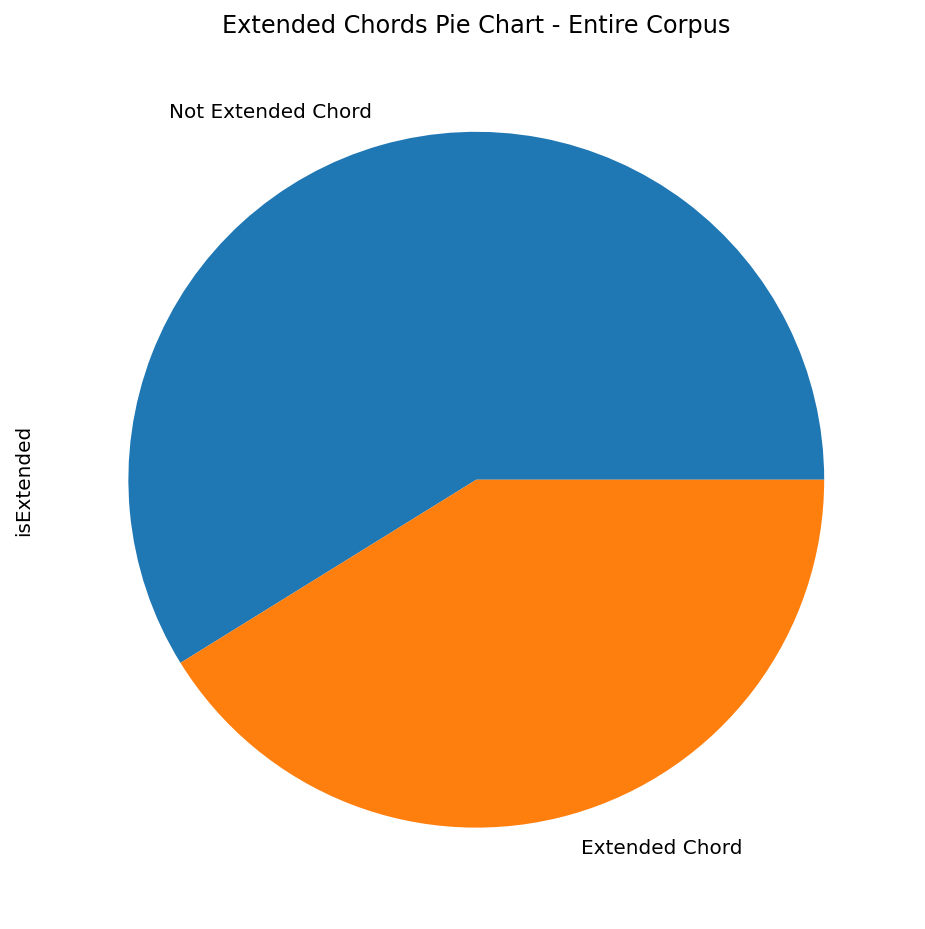

In [22]:
# Plot distribution of chord types
piePlot = raw_extendeds.plot(kind='pie', figsize=(8,8), title='Extended Chords Pie Chart - Entire Corpus')

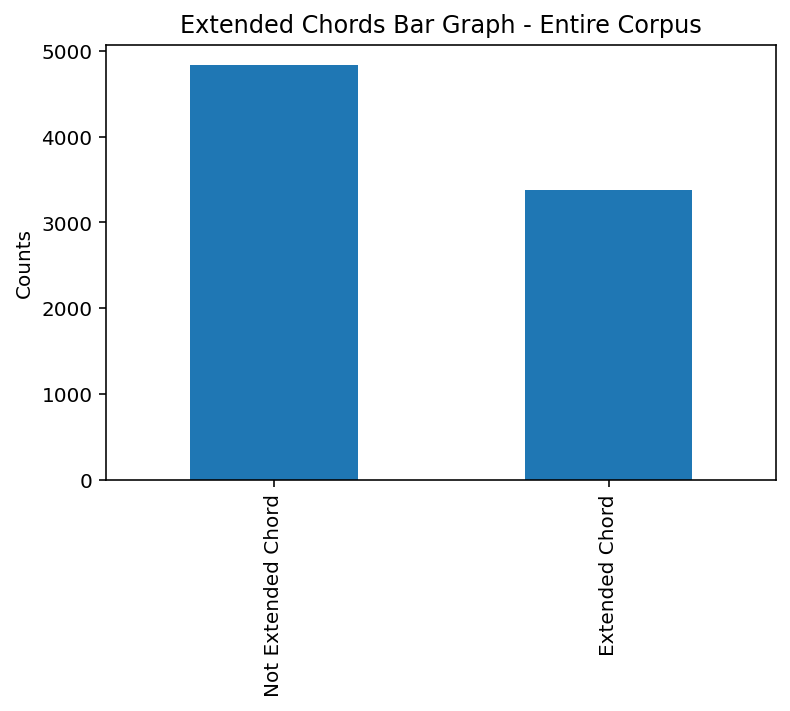

In [25]:
barPlot = raw_extendeds.plot(kind='bar', title='Extended Chords Bar Graph - Entire Corpus', ylabel='Counts')

In [42]:
by_epoch = less_chord_Info.groupby(by='Epoch')
values = by_epoch['isExtended'].value_counts()

<AxesSubplot:title={'center':'Extended Chords Bar Graph - By Epoch'}, ylabel='Counts'>

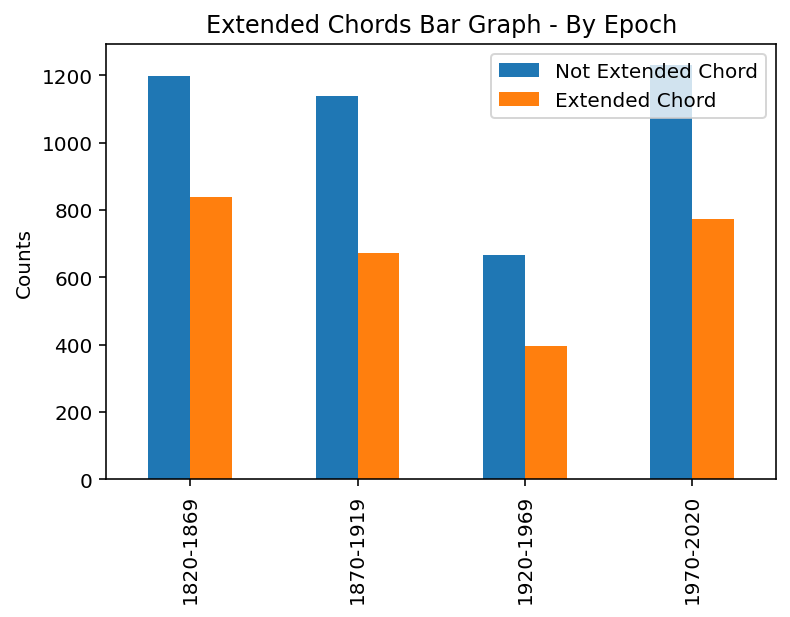

In [47]:
#Reorganize the dataframe for easy graphing
non_extended = []
extended = []
index = ['1820-1869', '1870-1919', '1920-1969', '1970-2020']
for i in range(len(values)):
    if i % 2 == 0:
        non_extended.append(values[i])
    else:
        extended.append(values[i])
new_epochdf = pd.DataFrame({'Not Extended Chord': non_extended, 'Extended Chord': extended}, index=index)
new_epochdf.plot(kind='bar', title='Extended Chords Bar Graph - By Epoch', ylabel='Counts')

In [ ]:
# Notes from after class - 11/9/20
# chord changes only occur when root note changes
# There are only chord changes when the root changes???
# e.g. if >75% of notes are the same, then doesn't count as a chord change
# filter out everything with < 3 pitch classes